In [ ]:
%load ex6.m

In [ ]:
%% Machine Learning Online Class
%  Exercise 6 | Support Vector Machines
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     gaussianKernel.m
%     dataset3Params.m
%     processEmail.m
%     emailFeatures.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% =============== Part 1: Loading and Visualizing Data ================
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

% Plot training data
plotData(X, y);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% ==================== Part 2: Training Linear SVM ====================
%  The following code will train a linear SVM on the dataset and plot the
%  decision boundary learned.
%

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

fprintf('\nTraining Linear SVM ...\n')

% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)
C = 1;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
visualizeBoundaryLinear(X, y, model);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =============== Part 3: Implementing Gaussian Kernel ===============
%  You will now implement the Gaussian kernel to use
%  with the SVM. You should complete the code in gaussianKernel.m
%
fprintf('\nEvaluating the Gaussian Kernel ...\n')

x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
sim = gaussianKernel(x1, x2, sigma);

fprintf(['Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 0.5 :' ...
         '\n\t%f\n(this value should be about 0.324652)\n'], sim);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =============== Part 4: Visualizing Dataset 2 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

% Plot training data
plotData(X, y);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
%  After you have implemented the kernel, we can now use it to train the 
%  SVM classifier.
% 
fprintf('\nTraining SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n');

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

% SVM Parameters
C = 1; sigma = 0.1;

% We set the tolerance and max_passes lower here so that the code will run
% faster. However, in practice, you will want to run the training to
% convergence.
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 
visualizeBoundary(X, y, model);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =============== Part 6: Visualizing Dataset 3 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

% Plot training data
plotData(X, y);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

%  This is a different dataset that you can use to experiment with. Try
%  different values of C and sigma here.
% 

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

% Try different SVM Parameters here
[C, sigma] = dataset3Params(X, y, Xval, yval);

% Train the SVM
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));
visualizeBoundary(X, y, model);

fprintf('Program paused. Press enter to continue.\n');
pause;



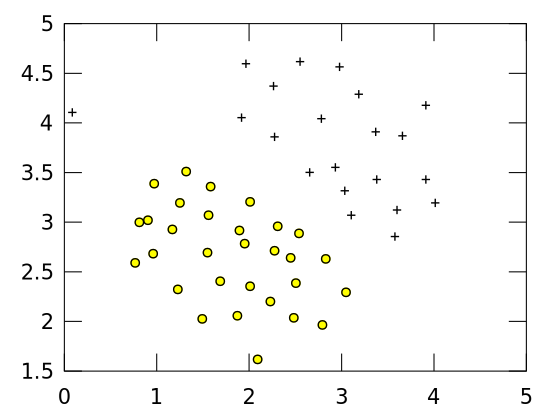

In [1]:
load('ex6data1.mat');

% Plot training data
plotData(X, y);

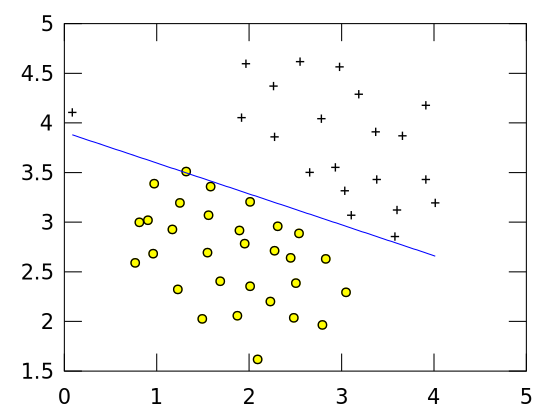

In [2]:
C = 100;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
visualizeBoundaryLinear(X, y, model);


In [ ]:
%load gaussianKernel.m

In [ ]:
%%file gaussianKernel.m
function sim = gaussianKernel(x1, x2, sigma)
%RBFKERNEL returns a radial basis function kernel between x1 and x2
%   sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
%   and returns the value in sim

% Ensure that x1 and x2 are column vectors
x1 = x1(:); x2 = x2(:);

% You need to return the following variables correctly.
sim = 0;

% ====================== YOUR CODE HERE ======================
% Instructions: Fill in this function to return the similarity between x1
%               and x2 computed using a Gaussian kernel with bandwidth
%               sigma
%
%


sim = exp( -1 * sum((x1-x2).^2)/(2 * sigma.^2));


% =============================================================
    
end


## submit test cases

In [ ]:
  % Random Test Cases
  x1 = sin(1:10)';
  x2 = cos(1:10)';
  ec = 'the quick brown fox jumped over the lazy dog';
  wi = 1 + abs(round(x1 * 1863));
  wi = [wi ; wi];
  gaussianKernel(x1, x2, 2)
%  load('ex6data3.mat');
%[C, sigma] = dataset3Params(X, y, Xval, yval);
%    word_indices = processEmail(ec);
%       x = emailFeatures(wi);

In [21]:
%load dataset3Params.m

In [23]:
%%file dataset3Params.m
function [C, sigma] = dataset3Params(X, y, Xval, yval)
%EX6PARAMS returns your choice of C and sigma for Part 3 of the exercise
%where you select the optimal (C, sigma) learning parameters to use for SVM
%with RBF kernel
%   [C, sigma] = EX6PARAMS(X, y, Xval, yval) returns your choice of C and 
%   sigma. You should complete this function to return the optimal C and 
%   sigma based on a cross-validation set.
%

% You need to return the following variables correctly.
C = 1;
sigma = 0.1;

% ====================== YOUR CODE HERE ======================
% Instructions: Fill in this function to return the optimal C and sigma
%               learning parameters found using the cross validation set.
%               You can use svmPredict to predict the labels on the cross
%               validation set. For example, 
%                   predictions = svmPredict(model, Xval);
%               will return the predictions on the cross validation set.
%
%  Note: You can compute the prediction error using 
%        mean(double(predictions ~= yval))
%







% =========================================================================

end


Created file '/Users/jlatmann/Programming/octave/machine-learning-ex6/ex6/dataset3Params.m'.


In [ ]:
load('ex6data2.mat');

% Plot training data
plotData(X, y);


In [ ]:
%load visualizeBoundary.m

In [15]:
%%file visualizeBoundary.m
function visualizeBoundary(X, y, model, varargin)
%VISUALIZEBOUNDARY plots a non-linear decision boundary learned by the SVM
%   VISUALIZEBOUNDARYLINEAR(X, y, model) plots a non-linear decision 
%   boundary learned by the SVM and overlays the data on it

% Plot the training data on top of the boundary
plotData(X, y)

% Make classification predictions over a grid of values
x1plot = linspace(min(X(:,1)), max(X(:,1)), 100)';
x2plot = linspace(min(X(:,2)), max(X(:,2)), 100)';
[X1, X2] = meshgrid(x1plot, x2plot);
vals = zeros(size(X1));
for i = 1:size(X1, 2)
   this_X = [X1(:, i), X2(:, i)];
   vals(:, i) = svmPredict(model, this_X);
end

% Plot the SVM boundary
hold on
contour(X1, X2, vals, [0 1], 'LineColor', 'b');
hold off;

end

Created file '/Users/jlatmann/Programming/octave/machine-learning-ex6/ex6/visualizeBoundary.m'.


In [3]:
load('ex6data2.mat');

% SVM Parameters
C = 1; sigma = 0.1;

% We set the tolerance and max_passes lower here so that the code will run
% faster. However, in practice, you will want to run the training to
% convergence.
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 
%visualizeBoundary(X, y, model);

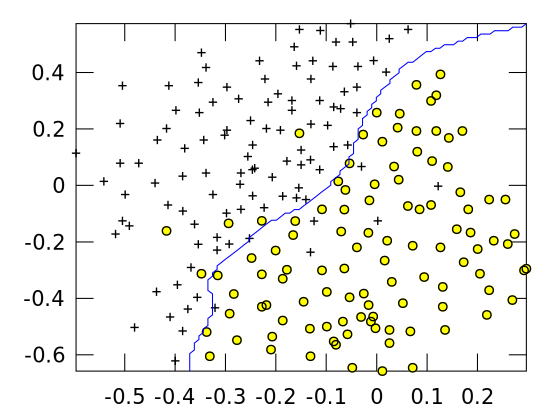

vals =

 Columns 1 through 20:

   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [14]:
visualizeBoundary(X, y, model);

In [ ]:
%load svmTrain.m

In [5]:
load('ex6data3.mat')

In [12]:
C, sigma

C =  1
sigma =  0.10000


In [8]:
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 

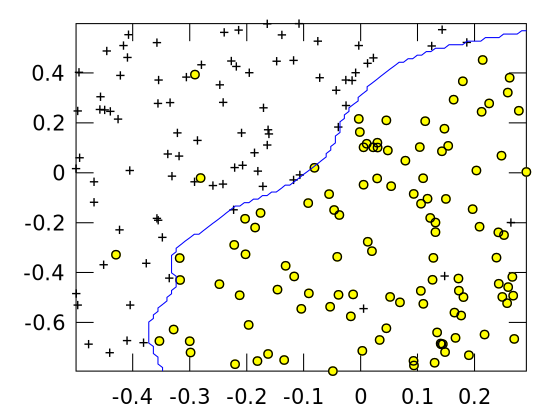

In [10]:
visualizeBoundary(Xval, yval, model);

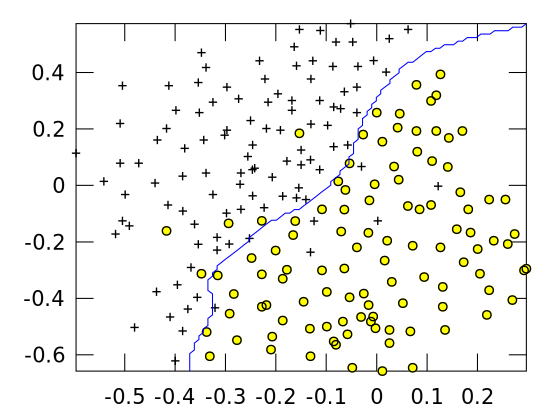

In [11]:
visualizeBoundary(X, y, model);

In [16]:
sum(svmPredict(model, Xval) != yval)

ans =  6


In [19]:
bestError = [0,0,1000]
for C = [0.01 0.03 0.1 0.3 1 3 10 30]
    for sigma = [0.01 0.03 0.1 0.3 1 3 10 30]
        model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 
        thisError = sum(svmPredict(model, Xval) != yval)
        if thisError < bestError(3)
            bestError = [C,sigma, thisError]
        end
    end
end
        


bestError =

      0      0   1000

thisError =  113
bestError =

   1.0000e-02   1.0000e-02   1.1300e+02

thisError =  12
bestError =

    0.010000    0.030000   12.000000

thisError =  9
bestError =

   0.010000   0.100000   9.000000

thisError =  29
thisError =  36
thisError =  36
thisError =  36
thisError =  37
thisError =  113
thisError =  12
thisError =  9
thisError =  28
thisError =  36
thisError =  36
thisError =  36
thisError =  36
thisError =  113
thisError =  12
thisError =  9
thisError =  16
thisError =  34
thisError =  36
thisError =  36
thisError =  36
thisError =  113
thisError =  12
thisError =  7
bestError =

   0.30000   0.10000   7.00000

thisError =  12
thisError =  20
thisError =  36
thisError =  36
thisError =  36
thisError =  113
thisError =  13
thisError =  6
bestError =

   1.00000   0.10000   6.00000

thisError =  13
thisError =  16
thisError =  32
thisError =  36
thisError =  37
thisError =  113
thisError =  16
thisError =  7
thisError =  16
thisError =  17
t

In [20]:
3 != 2

ans =  1


In [24]:
%load ex6_spam.m

In [ ]:
%% Machine Learning Online Class
%  Exercise 6 | Spam Classification with SVMs
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     gaussianKernel.m
%     dataset3Params.m
%     processEmail.m
%     emailFeatures.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% ==================== Part 1: Email Preprocessing ====================
%  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
%  to convert each email into a vector of features. In this part, you will
%  implement the preprocessing steps for each email. You should
%  complete the code in processEmail.m to produce a word indices vector
%  for a given email.

fprintf('\nPreprocessing sample email (emailSample1.txt)\n');

% Extract Features
file_contents = readFile('emailSample1.txt');
word_indices  = processEmail(file_contents);

% Print Stats
fprintf('Word Indices: \n');
fprintf(' %d', word_indices);
fprintf('\n\n');

fprintf('Program paused. Press enter to continue.\n');
pause;

%% ==================== Part 2: Feature Extraction ====================
%  Now, you will convert each email into a vector of features in R^n. 
%  You should complete the code in emailFeatures.m to produce a feature
%  vector for a given email.

fprintf('\nExtracting features from sample email (emailSample1.txt)\n');

% Extract Features
file_contents = readFile('emailSample1.txt');
word_indices  = processEmail(file_contents);
features      = emailFeatures(word_indices);

% Print Stats
fprintf('Length of feature vector: %d\n', length(features));
fprintf('Number of non-zero entries: %d\n', sum(features > 0));

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =========== Part 3: Train Linear SVM for Spam Classification ========
%  In this section, you will train a linear classifier to determine if an
%  email is Spam or Not-Spam.

% Load the Spam Email dataset
% You will have X, y in your environment
load('spamTrain.mat');

fprintf('\nTraining Linear SVM (Spam Classification)\n')
fprintf('(this may take 1 to 2 minutes) ...\n')

C = 0.1;
model = svmTrain(X, y, C, @linearKernel);

p = svmPredict(model, X);

fprintf('Training Accuracy: %f\n', mean(double(p == y)) * 100);

%% =================== Part 4: Test Spam Classification ================
%  After training the classifier, we can evaluate it on a test set. We have
%  included a test set in spamTest.mat

% Load the test dataset
% You will have Xtest, ytest in your environment
load('spamTest.mat');

fprintf('\nEvaluating the trained Linear SVM on a test set ...\n')

p = svmPredict(model, Xtest);

fprintf('Test Accuracy: %f\n', mean(double(p == ytest)) * 100);
pause;


%% ================= Part 5: Top Predictors of Spam ====================
%  Since the model we are training is a linear SVM, we can inspect the
%  weights learned by the model to understand better how it is determining
%  whether an email is spam or not. The following code finds the words with
%  the highest weights in the classifier. Informally, the classifier
%  'thinks' that these words are the most likely indicators of spam.
%

% Sort the weights and obtin the vocabulary list
[weight, idx] = sort(model.w, 'descend');
vocabList = getVocabList();

fprintf('\nTop predictors of spam: \n');
for i = 1:15
    fprintf(' %-15s (%f) \n', vocabList{idx(i)}, weight(i));
end

fprintf('\n\n');
fprintf('\nProgram paused. Press enter to continue.\n');
pause;

%% =================== Part 6: Try Your Own Emails =====================
%  Now that you've trained the spam classifier, you can use it on your own
%  emails! In the starter code, we have included spamSample1.txt,
%  spamSample2.txt, emailSample1.txt and emailSample2.txt as examples. 
%  The following code reads in one of these emails and then uses your 
%  learned SVM classifier to determine whether the email is Spam or 
%  Not Spam

% Set the file to be read in (change this to spamSample2.txt,
% emailSample1.txt or emailSample2.txt to see different predictions on
% different emails types). Try your own emails as well!
filename = 'spamSample1.txt';

% Read and predict
file_contents = readFile(filename);
word_indices  = processEmail(file_contents);
x             = emailFeatures(word_indices);
p = svmPredict(model, x);

fprintf('\nProcessed %s\n\nSpam Classification: %d\n', filename, p);
fprintf('(1 indicates spam, 0 indicates not spam)\n\n');



In [25]:
%load processEmail.m

In [44]:
%%file processEmail.m
function word_indices = processEmail(email_contents)
%PROCESSEMAIL preprocesses a the body of an email and
%returns a list of word_indices 
%   word_indices = PROCESSEMAIL(email_contents) preprocesses 
%   the body of an email and returns a list of indices of the 
%   words contained in the email. 
%

% Load Vocabulary
vocabList = getVocabList();

% Init return value
word_indices = [];

% ========================== Preprocess Email ===========================

% Find the Headers ( \n\n and remove )
% Uncomment the following lines if you are working with raw emails with the
% full headers

% hdrstart = strfind(email_contents, ([char(10) char(10)]));
% email_contents = email_contents(hdrstart(1):end);

% Lower case
email_contents = lower(email_contents);

% Strip all HTML
% Looks for any expression that starts with < and ends with > and replace
% and does not have any < or > in the tag it with a space
email_contents = regexprep(email_contents, '<[^<>]+>', ' ');

% Handle Numbers
% Look for one or more characters between 0-9
email_contents = regexprep(email_contents, '[0-9]+', 'number');

% Handle URLS
% Look for strings starting with http:// or https://
email_contents = regexprep(email_contents, ...
                           '(http|https)://[^\s]*', 'httpaddr');

% Handle Email Addresses
% Look for strings with @ in the middle
email_contents = regexprep(email_contents, '[^\s]+@[^\s]+', 'emailaddr');

% Handle $ sign
email_contents = regexprep(email_contents, '[$]+', 'dollar');


% ========================== Tokenize Email ===========================

% Output the email to screen as well
fprintf('\n==== Processed Email ====\n\n');

% Process file
l = 0;

while ~isempty(email_contents)

    % Tokenize and also get rid of any punctuation
    [str, email_contents] = ...
       strtok(email_contents, ...
              [' @$/#.-:&*+=[]?!(){},''">_<;%' char(10) char(13)]);
   
    % Remove any non alphanumeric characters
    str = regexprep(str, '[^a-zA-Z0-9]', '');

    % Stem the word 
    % (the porterStemmer sometimes has issues, so we use a try catch block)
    try str = porterStemmer(strtrim(str)); 
    catch str = ''; continue;
    end;

    % Skip the word if it is too short
    if length(str) < 1
       continue;
    end

    % Look up the word in the dictionary and add to word_indices if
    % found
    % ====================== YOUR CODE HERE ======================
    % Instructions: Fill in this function to add the index of str to
    %               word_indices if it is in the vocabulary. At this point
    %               of the code, you have a stemmed word from the email in
    %               the variable str. You should look up str in the
    %               vocabulary list (vocabList). If a match exists, you
    %               should add the index of the word to the word_indices
    %               vector. Concretely, if str = 'action', then you should
    %               look up the vocabulary list to find where in vocabList
    %               'action' appears. For example, if vocabList{18} =
    %               'action', then, you should add 18 to the word_indices 
    %               vector (e.g., word_indices = [word_indices ; 18]; ).
    % 
    % Note: vocabList{idx} returns a the word with index idx in the
    %       vocabulary list.
    % 
    % Note: You can use strcmp(str1, str2) to compare two strings (str1 and
    %       str2). It will return 1 only if the two strings are equivalent.
    %
    
    for i = 1: length(vocabList)
        if strcmp(str,vocabList{i}) == 1
            work_indices = [word_indices ; i]
            break
        end
    end
    








    % =============================================================


    % Print to screen, ensuring that the output lines are not too long
    if (l + length(str) + 1) > 78
        fprintf('\n');
        l = 0;
    end
    fprintf('%s ', str);
    l = l + length(str) + 1;

end

% Print footer
fprintf('\n\n=========================\n');

end


Created file '/Users/jlatmann/Programming/octave/machine-learning-ex6/ex6/processEmail.m'.


In [28]:
x = []

x = [](0x0)


In [30]:
x(3) = 3

x =

   3   0   3



In [43]:
for i = 1: length(vocabList)
    if strcmp("but",vocabList{i}) == 1
        ixx = i
        break
    end
end

ixx =  225


In [41]:
ixx

error: 'ixx' undefined near line 1 column 1


In [35]:
vocabList{330}

ans = comput


In [37]:
length(vocabList)

ans =  1899
